In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['WMT', 'FB', 'BP']
pf_data = pd.read_csv('/Users/arm2/Downloads/Python for Finance and Investment (Udemy)/WMT_FB_BP_2014_2017.csv', index_col='Date')

In [3]:
pf_data.head()

,WMT,FB,BP
Date,,,
2013-12-31,70.753525,54.650002,37.758350
2014-01-02,70.951355,54.709999,37.268997
2014-01-03,70.717583,54.560001,37.183540
2014-01-06,70.321945,57.200001,37.284527
2014-01-07,70.537735,57.919998,37.711742


In [4]:
pf_data.tail()

,WMT,FB,BP
Date,,,
2017-12-06,96.769997,176.059998,39.580002
2017-12-07,96.779999,180.139999,39.310001
2017-12-08,96.550003,179.000000,39.639999
2017-12-11,96.930000,179.039993,39.930000
2017-12-12,96.699997,176.960007,40.660000


<Axes: xlabel='Date'>

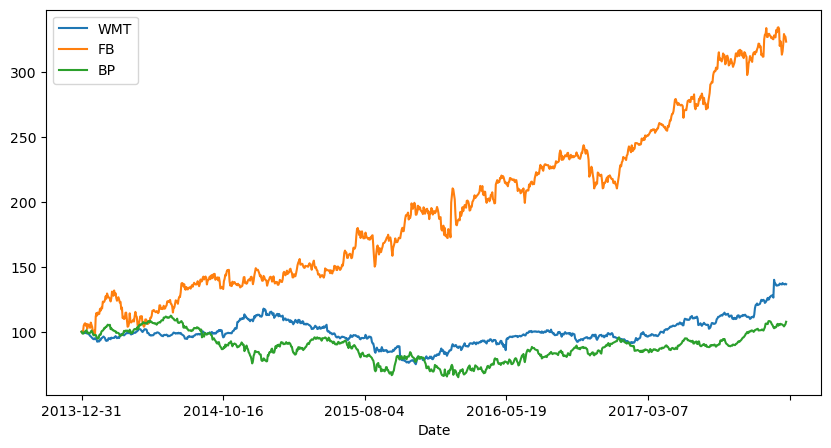

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean()

WMT    0.000314
FB     0.001181
BP     0.000074
dtype: float64

In [8]:
log_returns.mean() * 250

WMT    0.078495
FB     0.295220
BP     0.018603
dtype: float64

In [9]:
log_returns.cov() * 250

,WMT,FB,BP
WMT,0.032659,0.007449,0.005651
FB,0.007449,0.074427,0.013889
BP,0.005651,0.013889,0.056863


In [10]:
log_returns.corr()

,WMT,FB,BP
WMT,1.000000,0.151081,0.131138
FB,0.151081,1.000000,0.213505
BP,0.131138,0.213505,1.000000


In [11]:
num_assets = len(assets)

In [12]:
num_assets

3

In [13]:
arr = np.random.random(2)
arr

array([0.5510071 , 0.78057431])

In [14]:
arr[0] + arr[1]

1.3315814107835078

In [15]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.20553511, 0.37961679, 0.4148481 ])

In [16]:
weights[0] + weights[1] + weights[2]

0.9999999999999999

Expected Portfolio Return:

In [17]:
np.sum(weights * log_returns.mean()) * 250

0.13592112529117265

Expected Portfolio Variance:

In [18]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.02839202832186137

Expected Portfolio Volatility:

In [19]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.16849934220008508

***

In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.11257651111520928,
  0.1047748308132302,
  0.12029835373410926,
  0.1235020062325711,
  0.16081234994854915,
  0.1340946926959128,
  0.07117335269472636,
  0.19300105668084258,
  0.13861576926378813,
  0.08042654456576812,
  0.2002383437487968,
  0.1444445318933744,
  0.19848347165661703,
  0.16458043147865467,
  0.17518272076885422,
  0.19162479673944177,
  0.046847561558935304,
  0.14265756035377647,
  0.1340991575273764,
  0.17213897170222034,
  0.13540645145933436,
  0.1237728998125688,
  0.12686934342636103,
  0.14497908026461218,
  0.13710258739143755,
  0.13627119605310092,
  0.1656032008507851,
  0.060678577087821345,
  0.14611253211052713,
  0.05347123691876967,
  0.1175768955160757,
  0.15051722649502774,
  0.0913831128073796,
  0.08918614651268073,
  0.12869177270348214,
  0.06853221577756925,
  0.10620944766005296,
  0.15349121651804953,
  0.05814314903891729,
  0.16181419736526734,
  0.18356318907387795,
  0.1272385527986241,
  0.15371102551541746,
  0.0900824210759133

In [21]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.18103537, 0.1671088 , 0.11315237, 0.09183911, 0.08807379,
        0.16480063, 0.19146769, 0.16713963, 0.14776925, 0.10761455,
        0.12462998, 0.05106693, 0.10355121, 0.12733015, 0.16071734,
        0.11068949, 0.11777808, 0.17319581, 0.15687583, 0.14061704,
        0.11076017, 0.17072427, 0.14540547, 0.11971054, 0.07468839,
        0.08035926, 0.11282925, 0.13230687, 0.15095247, 0.1066394 ,
        0.05559573, 0.18184733, 0.14824965, 0.10023773, 0.15532922,
        0.10940309, 0.11610957, 0.11318193, 0.13507189, 0.16616687,
        0.14359021, 0.16451966, 0.18300385, 0.11962783, 0.09529651,
        0.13396051, 0.08619143, 0.11030335, 0.19401434, 0.06376756,
        0.14734217, 0.04865599, 0.11165456, 0.21443101, 0.14071923,
        0.06866358, 0.1008031 , 0.08745838, 0.11319399, 0.12168714,
        0.11272668, 0.12375825, 0.15356696, 0.08754329, 0.12830389,
        0.08288921, 0.07651648, 0.2036874 , 0.13400861, 0.18130004,
        0.16899645, 0.21408215, 0.15244566, 0.13

In [22]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [23]:
portfolios.head()

,Return,Volatility
0,0.181035,0.183742
1,0.167109,0.162831
2,0.113152,0.149822
3,0.091839,0.147187
4,0.088074,0.194929


In [24]:
portfolios.tail()

,Return,Volatility
995,0.124538,0.149268
996,0.182257,0.172869
997,0.129448,0.148432
998,0.120939,0.151028
999,0.169286,0.168972


Text(0, 0.5, 'Expected Return')

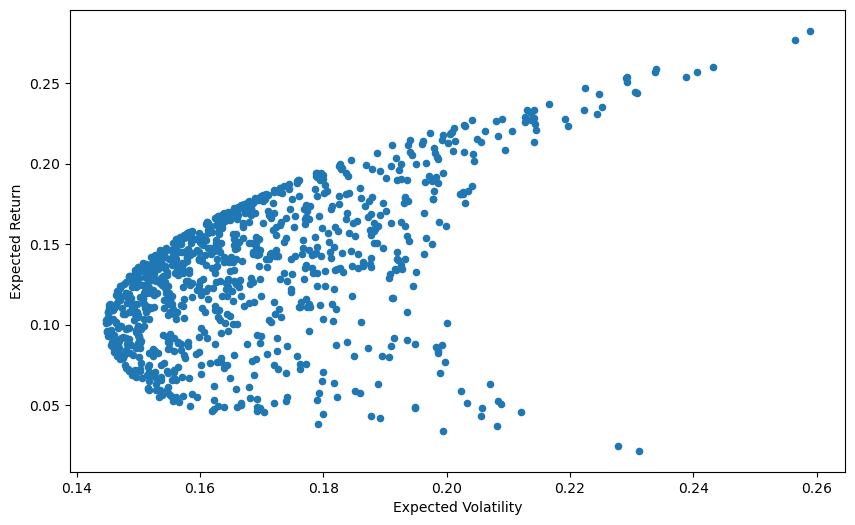

In [25]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')